# Medical Cost Personal Datasets

Insurance Forecast by using Linear Regression

## Target

1. 建立預測醫療險保險費的模型，利用各項特徵（例如年齡、性別、BMI、子女數量、吸菸狀態及居住地區）建立模型，預測個體的保險費用。對保險公司在定價時有應用的價值，能夠根據客戶的基本信息給出合理的保費估算。
2. 通過模型的特徵重要性評估，識別哪些因素對保險費的影響最大。例如，吸菸狀態和BMI往往是決定保險費高低的關鍵因素。這有助於了解風險驅動因素，進一步優化定價策略。

## Introduction

Data source:

- Kaggle url: https://www.kaggle.com/datasets/mirichoi0218/insurance

Column Details of `insurance.csv`:

- age: 年齡
- sex: 性別
- bmi: bmi
- children: 子女數量
- smoker: 吸菸別
- region: 居住地區
- charges: 保險費

## Read Data

### Import Library

In [270]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

讀取`insurance.csv`資料，並賦值給變量`original_data`。

In [210]:
original_data = pd.read_csv('insurance.csv')
original_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Preprocessing

為了保持原始數據不被更動，將原始數據複製一份，並賦值給變量`cleaned_data`。

In [211]:
cleaned_data = original_data.copy()

### 檢查數據整齊度

In [212]:
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


觀察前5筆資料，數據不存在結構問題，因此不需要進行數據結構調整。

### 檢查數據乾淨度

先透過`info()`方法，查看資料的基本資訊。

In [213]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


從輸出結果來看，得出以下結論：

1. 不存在缺失值問題，因此不需要進行缺失值處理。
2. 不存在不合理的資料型態，因此不需要進行資料型態轉換。

透過`describe()`方法，查看資料的統計資訊。

In [214]:
cleaned_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


從輸出結果來看，數據不存在異常值問題，因此不需要進行異常值處理。

## Data Visualization

### 年齡 vs 保險費

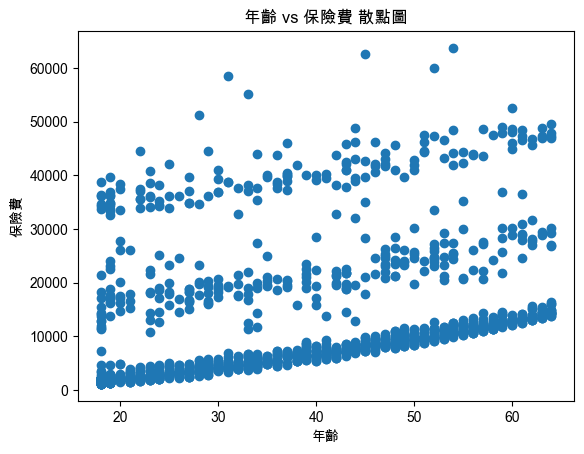

In [215]:
y = cleaned_data['charges']
x = cleaned_data['age']

plt.scatter(x, y)
plt.xlabel('年齡')
plt.ylabel('保險費')
plt.title("年齡 vs 保險費 散點圖")
plt.show()

從圖片的結果，可以得出以下結論：

1. 年齡與保險費之間存在正相關關係，隨著年齡的增加，保險費也會隨之增加。
2. 相同年齡下，保險費也有差異，表示有其他因素影響保險費。

### 性別 vs 保險費

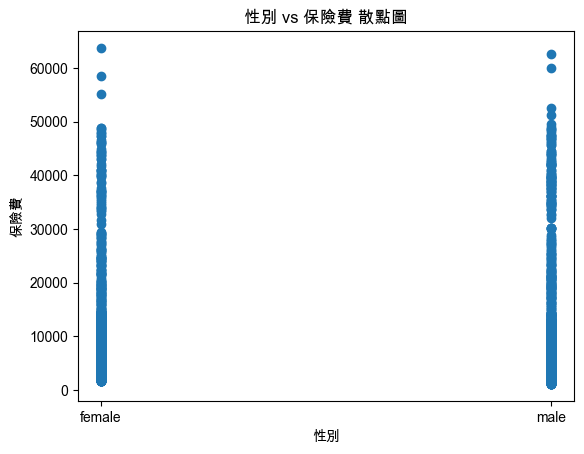

In [216]:
y = cleaned_data['charges']
x = cleaned_data['sex']

plt.scatter(x, y)
plt.xlabel('性別')
plt.ylabel('保險費')
plt.title("性別 vs 保險費 散點圖")
plt.show()

從圖片的結果，可以得出以下結論：

1. 男性與女性的保險費分佈沒有明顯的差異。
2. 相同性別下，保險費也有差異，表示有其他因素影響保險費。

### BMI vs 保險費

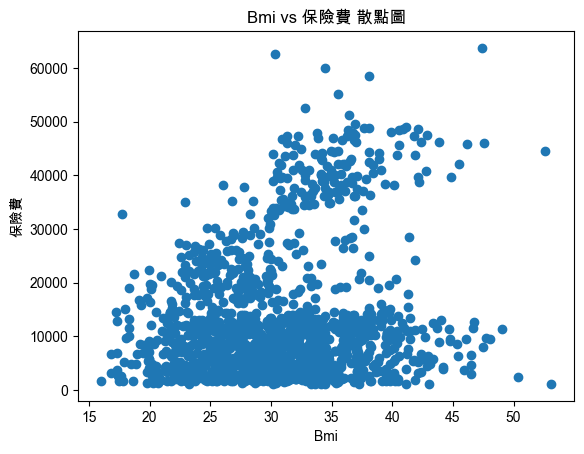

In [217]:
y = cleaned_data['charges']
x = cleaned_data['bmi']

plt.scatter(x, y)
plt.xlabel('Bmi')
plt.ylabel('保險費')
plt.title("Bmi vs 保險費 散點圖")
plt.show()

從圖片的結果，可以得出以下結論：

1. BMI與保險費之間存在正相關關係，隨著BMI的增加，保險費也會隨之增加。
2. BMI<30的人，保險費分佈較為集中；BMI>=30的人，保險費分佈較為分散。

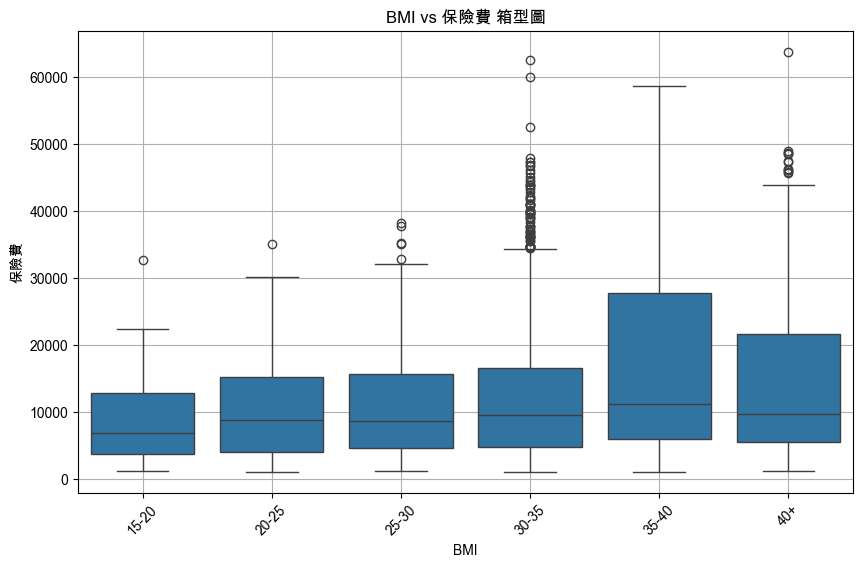

In [218]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(cleaned_data['bmi'], bins=[15, 20, 25, 30, 35, 40, 50],
                     labels=['15-20', '20-25', '25-30', '30-35', '35-40', '40+']),
            y=cleaned_data['charges'])

plt.xlabel('BMI')
plt.ylabel('保險費')
plt.title('BMI vs 保險費 箱型圖')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

從圖片的結果，可以得出以下結論：

1. BMI與保險費確實有正向關聯，BMI越高，保險費中位數與異常值越大。
2. BMI>=30，保險費異常值明顯增多，可能是因為有更多的高風險人群。

### 子女數量 vs 保險費

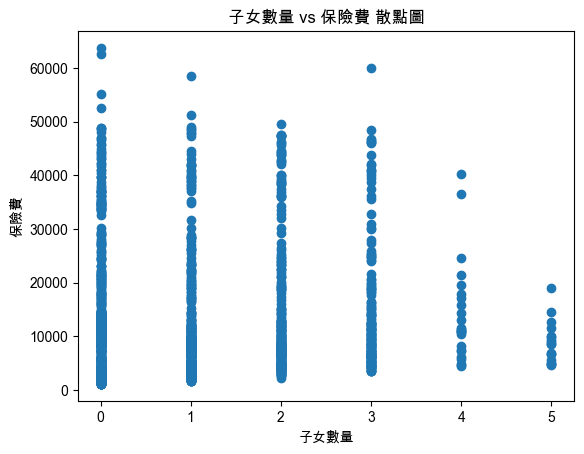

In [219]:
y = cleaned_data['charges']
x = cleaned_data['children']

plt.scatter(x, y)
plt.xlabel('子女數量')
plt.ylabel('保險費')
plt.title("子女數量 vs 保險費 散點圖")
plt.show()

從圖片的結果，可以得出以下結論：

1. 不論子女數量，保險費都集中在較低的區間，表示子女數量對保險費的影響不大。
2. 子女數量較多，保險費明顯較少高額的點，可能是數據較少，或者某些考量 (e.g. 經濟壓力) 選擇較低的單位數。

### 吸菸別 vs 保險費

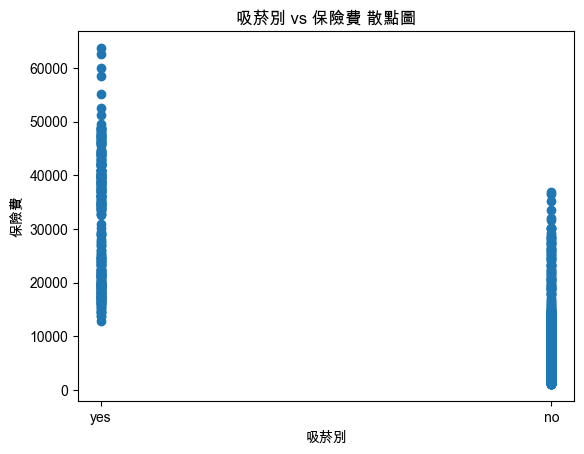

In [220]:
y = cleaned_data['charges']
x = cleaned_data['smoker']

plt.scatter(x, y)
plt.xlabel('吸菸別')
plt.ylabel('保險費')
plt.title("吸菸別 vs 保險費 散點圖")
plt.show()

從圖片的結果，可以得出以下結論：

1. 吸菸者的平均保險費遠高於非吸菸者，顯示吸菸別是影響保險費的關鍵因素。

### 居住地區 vs 保險費

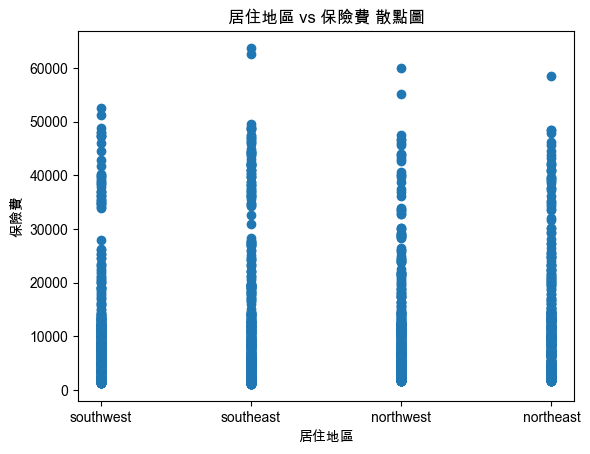

In [221]:
y = cleaned_data['charges']
x = cleaned_data['region']

plt.scatter(x, y)
plt.xlabel('居住地區')
plt.ylabel('保險費')
plt.title("居住地區 vs 保險費 散點圖")
plt.show()

從圖片的結果，可以得出以下結論：

1. 不論居住地區，從保險費分佈看起來沒有明顯差異，表示居住地區對保險費的影響不大。

## 特徵工程

### One-Hot Encoding

In [222]:
# 後續要分析資料的關係，先複製一份資料，以便觀測資料
cleaned_data_1 = cleaned_data.copy()

cleaned_data = pd.get_dummies(
    cleaned_data,
    columns=['sex', 'smoker', 'region'],
    drop_first=True,
    dtype=int
)

In [223]:
cleaned_data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## 特徵與保險費的相關性

觀察各個特徵的數據，是否為線性數據。

### 特徵資料分佈

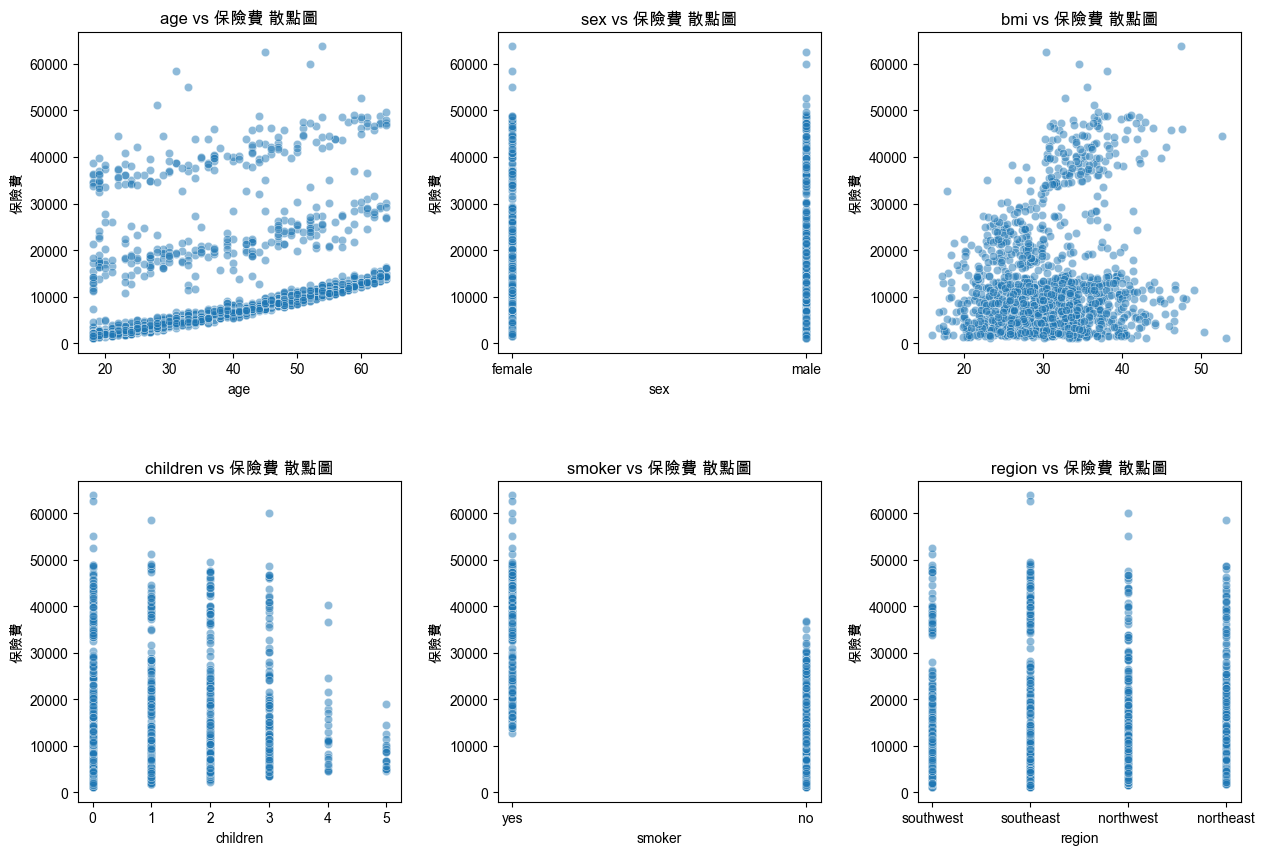

In [224]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']  # 需要測試的變數

# 設定行數與列數
rows = 2  # 2行
cols = 3  # 每行最多3張圖

plt.figure(figsize=(15, 10))  # 調整整體圖大小

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)  # 讓圖表排列成2行3列
    sns.scatterplot(x=cleaned_data_1[col], y=cleaned_data_1['charges'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('保險費')
    plt.title(f'{col} vs 保險費 散點圖')

# 調整圖與圖之間的距離，讓畫面不擠
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

從圖片的結果，可以得出以下資訊：

1. 年齡、BMI、吸菸別與保險費之間存在線性關係。
2. 性別、子女數量、居住地區與保險費之間不存在線性關係。

結論：

1. 尚無法線性迴歸模型，是否為最佳模型，需要進一步驗證。


### Pearson相關係數

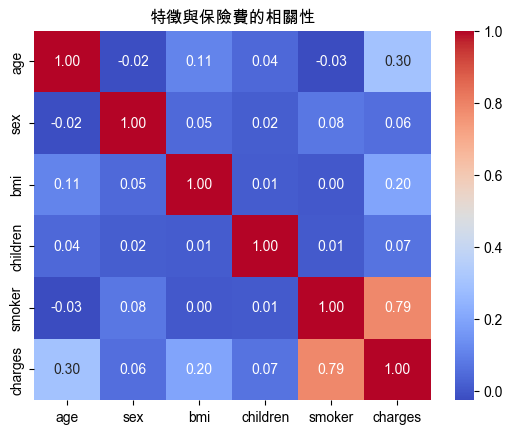

In [225]:
# 將非數值的特徵轉換為數值
cleaned_data_1['sex'] = cleaned_data_1['sex'].map({'male': 1, 'female': 0})  # 男性為1，女性為0
cleaned_data_1['smoker'] = cleaned_data_1['smoker'].map({'yes': 1, 'no': 0})  # 吸菸者為1，非吸菸者為0

correlation_matrix = cleaned_data_1[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('特徵與保險費的相關性')
plt.show()

從圖片的結果，可以得出以下資訊：

1. 性別、子女數量與保險費之間，不存在線性相關。
2. BMI與保險費之間，存在低等線性相關。
3. 年齡與保險費之間，存在中等線性相關（可能有非線性成分）。
4. 吸菸別與保險費之間，存在高等線性相關。

結論：

1. 透過Pearson相關係數，可以得知線性迴歸模型非最佳模型。

綜上所述，目前已知Linear Regression不是最佳模型，因此需要進一步實驗其他模型。

## 模型實驗

| 模型 | 適用情境          |
| --- |---------------|
| Linear Regression | 只適合簡單線性關係     |
| Polynomial Regression | 適合處理非線性關係     |
| Decision Tree | 適合處理非線性關係     |
| Random Forest | 降低過擬合，適合多特徵組合 |
| XGBoost | 適合大型數據        |
| LightGBM | 適合大型數據        |
| ANN | 適合大型數據        |

除了Linear Regression外，沒有其他資訊可以判斷哪個模型合適，因此需要進行模型比較。

| 指標 | 優點 | 缺點 | 適用場景     |
| --- | --- | --- |----------|
| MSE | 對大誤差敏感，適合數學推導 | 不易解釋，與原數據單位不同 | 需要強調誤差   |
| RMSE | 單位與數據一致，適合比較 | 仍然對極端值敏感 | 評估整體預測誤差 |
| MAE | 不受異常值影響，直觀易解釋 | 不強調大誤差 | 當數據有異常值時 |

選RMSE來評估模型的理由：

- 直觀解釋：RMSE的單位與保險費相同，能直接表示「平均預測誤差是多少錢」。
- 強調大誤差：我們的數據集中，吸菸者、高 BMI者的保費變化劇烈，RMSE能凸顯這些差異。

**為了避免失去報告的重心，該過程僅演示選擇模型的判斷過程，忽略超參數與其他會影響模型變因的實驗**

Linear Regression的RMSE: 5796.28
Polynomial Regression (Degree=2)的RMSE: 4551.13
Decision Tree的RMSE: 6348.44
Random Forest的RMSE: 4576.28
XGBoost的RMSE: 4517.29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
LightGBM的RMSE: 4534.03
Neural Network的RMSE: 10855.62


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


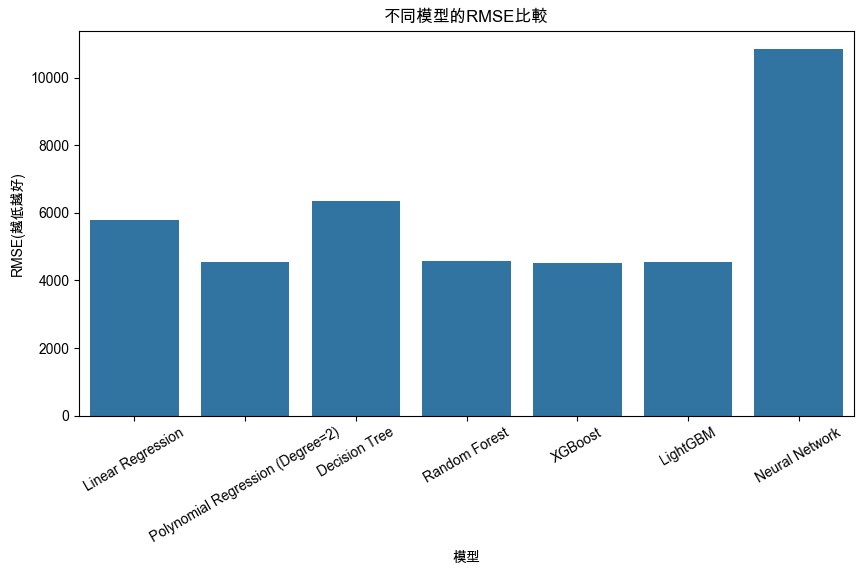

In [208]:
# # 定義要測試的演算法
# models = {
#     'Linear Regression': LinearRegression(),
#     'Polynomial Regression (Degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
#     'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
#     'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
#     'Neural Network': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
# }
#
# # 分割數據
# X = cleaned_data.drop(columns=['charges'])  # 特徵
# y = cleaned_data['charges']  # 目標變數
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # 存儲RMSE結果
# results = {}
#
# # 訓練和評估每個模型
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#
#     # 計算RMSE
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     results[name] = rmse
#     print(f"{name}的RMSE: {rmse:.2f}")
#
# # 畫圖比較結果
# plt.figure(figsize=(10, 5))
# sns.barplot(x=list(results.keys()), y=list(results.values()))
# plt.xlabel("模型")
# plt.ylabel("RMSE(越低越好)")
# plt.title("不同模型的RMSE比較")
# plt.xticks(rotation=30)
# plt.show()

從圖片的結果，可以得出以下資訊：

1. Linear Regression, Decision Tree, ANN的RMSE偏高，表示不適合當前數據。
2. Polynomial Regression, Random Forest, XGBoost, LightGBM的RMSE較低且差不多，選用這些模型做預測效果會比較好。

結論：

1. 故選用Polynomial Regression進行預測。

## 資料分割

In [232]:
X = cleaned_data.drop(columns=['charges'])
y = cleaned_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 建模

In [233]:
# 生成二次多項式特徵
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# 不能用fit_transform，避免數據洩漏
X_test_poly = poly.transform(X_test)

In [234]:
# 訓練線性回歸模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [235]:
# 預測
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

## 評估模型

In [230]:
# 計算RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

Train RMSE: 4778.19
Test RMSE: 4551.13


In [249]:
print(f'charges min: {cleaned_data["charges"].min()}')
print(f'charges max: {cleaned_data["charges"].max()}')

charges min: 1121.8739
charges max: 63770.42801


In [252]:
rmse_ratio = test_rmse / (cleaned_data["charges"].max() - cleaned_data["charges"].min())
print(f"RMSE比例(相對誤差比率): {rmse_ratio:.2%}")

RMSE比例(相對誤差比率): 7.26%


假設10%誤差可以接受，你的RMSE≈7.2%，屬於合理範圍。

In [243]:
std_charges = cleaned_data['charges'].std()
print(f"標準差: {std_charges:.2f}")

標準差: 12110.01


| 情況 | 標準差 vs. RMSE | 模型解釋 | 動作建議 |
| --- | --- | --- | --- |
| RMSE ≪ 標準差 | RMSE < 0.5 * std_charges | 模型預測表現良好，誤差低於數據變異範圍的一半 | 可以接受，不需要太多調整 |
| RMSE ≈ 標準差 | RMSE ≈ std_charges | 模型誤差接近數據的變異範圍，預測可能不夠精準 | 應該考慮調整模型，例如更高次多項式、特徵工程或其他算法 |
| RMSE > 標準差 | RMSE > std_charges | 模型誤差已經超過數據的變異範圍，說明模型可能沒學到數據的規律 | 需要優化模型，可能要更換算法或改善特徵工程 |

In [247]:
r2 = r2_score(y_test, y_test_pred)
print(f"R²: {r2:.4f}")

R²: 0.8666




R² 的範圍：
| R² | 解釋 |
| --- | --- |
| 0.8 ≤ R² ≤ 1.0 | 模型效果很好 |
| 0.6 ≤ R² < 0.8 | 模型還不錯，但可能可以優化 |
| 0.4 ≤ R² < 0.6 | 模型解釋能力普通 |
| R² < 0.4 | 模型效果不好 |


## 模型後續優化

如果要進一步提升模型準確度：

- 增加 degree=3 看看是否改善
- 加入 Ridge（L2 正則化）來防止過擬合
- 嘗試其他非線性模型
    - 隨機森林（Random Forest）
    - XGBoost / LightGBM
    - Neural Network

## 影響保險費最大的3個因素

/var/folders/q3/kq5h7c013t7b_cxfbp03jhcw0000gn/T/ipykernel_26208/163872903.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df_top["Coefficient"], y=coef_df_top["Feature"], palette="coolwarm")


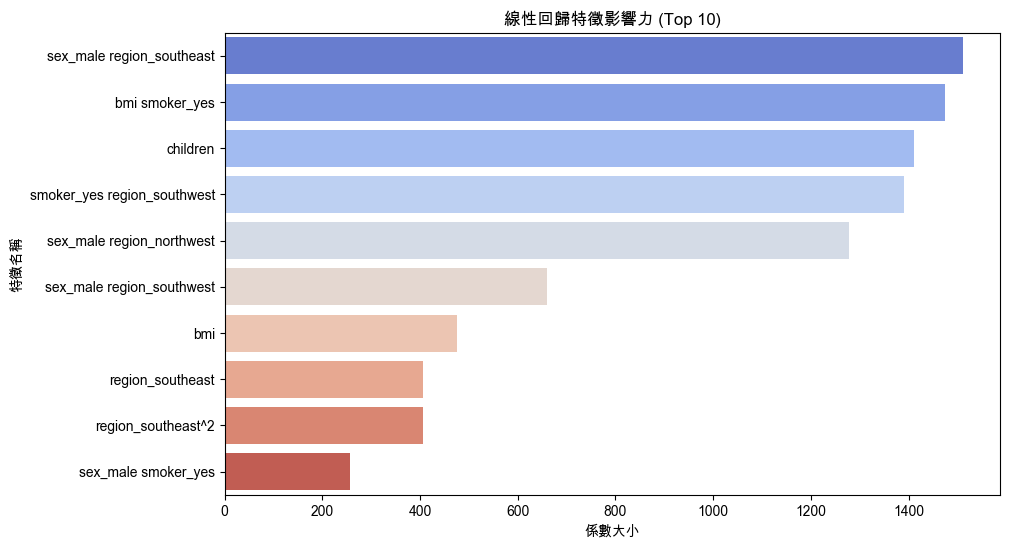

                      Feature  Coefficient
33  sex_male region_southeast  1510.893482
20             bmi smoker_yes  1475.362188
3                    children  1411.328470


In [261]:
# 獲取特徵名稱
feature_names = poly.get_feature_names_out(input_features=X.columns)

# 獲取線性回歸係數
coefficients = model.coef_.flatten()

# 轉換為 DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)  # 排序

# 顯示 DataFrame
top_n = 10  # 只顯示影響力前10名
coef_df_top = coef_df.head(top_n)

# 視覺化
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df_top["Coefficient"], y=coef_df_top["Feature"], palette="coolwarm")
plt.xlabel("係數大小")
plt.ylabel("特徵名稱")
plt.title("線性回歸特徵影響力 (Top 10)")
plt.show()

# 如果想要直接查看 DataFrame
print(coef_df.head(3))

從圖片的結果，可以得出以下結論：

1. 「男性 + 居住在東南地區」的組合，對保險費有最大的影響
   1. 男性的保險費可能本來就比女性高（死亡風險因素）
   2. 東南區可能有較高的醫療成本或較高的疾病風險
2. 「BMI * 吸煙」的組合，對保險費有很高的影響
   1. BMI（肥胖）+ 吸煙者的健康風險較高，保險公司會收取更高的保費
3. 「有多少個子女」，對保險費也有很高的影響
    1. 可能家庭醫療計劃會影響整體保費
    2. 可能這類人群可能會傾向購買較高額度的保險

## Insight檢驗

當被保險人的子女數量越多，對保險費的影響很高，這是一個有趣的發現。有可能因為子女數量較多，更無法承擔醫療風險，有可能會傾向購買高額度的保險，這可能是一個潛在的商機。

所以要進一步研究，假設「子女數量越多，會傾向購買更高額度的保險」是否為真。

### 長條圖

/var/folders/q3/kq5h7c013t7b_cxfbp03jhcw0000gn/T/ipykernel_26208/2195057336.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=children_avg_charges.index, y=children_avg_charges.values, palette="coolwarm")


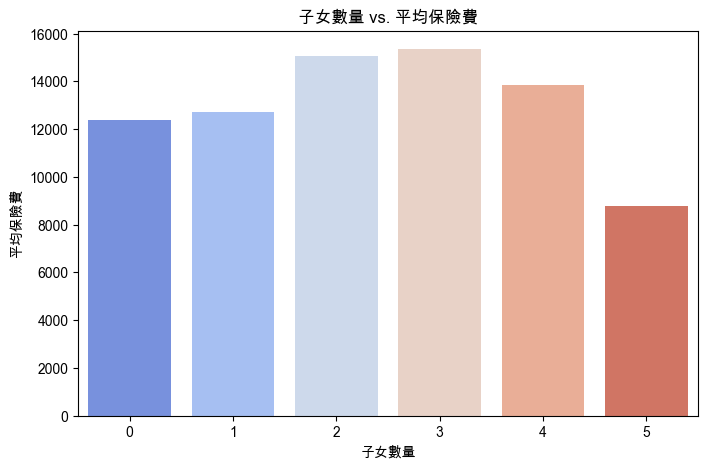

In [272]:
# 計算不同子女數量的平均保費
children_avg_charges = cleaned_data.groupby('children')['charges'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=children_avg_charges.index, y=children_avg_charges.values, palette="coolwarm")
plt.xlabel('子女數量')
plt.ylabel('平均保險費')
plt.title('子女數量 vs. 平均保險費')
plt.show()

僅透過長條圖，並無法確定該假設是否為真。

### ANOVA

是一種統計方法，用來檢測兩個或多個組之間的均值是否有顯著差異。

為什麼要用 ANOVA 來檢查子女數量是否影響保險費？

問題：子女數量是否影響保險費？

- 子女數量是類別變數(0, 1, 2, 3, 4, 5)。
- 保險費是連續變數(保費)。
- 我們想知道子女數量的不同值(0, 1, 2, …)之間，保險費的均值是否顯著不同。

因為子女數量不是連續變數，不能直接用線性回歸，我們用ANOVA來比較不同子女數量組別的保險費平均值是否有顯著差異。

ANOVA的基本假設

ANOVA主要是透過檢驗組內變異與組間變異的比例來判斷組別之間是否有顯著差異。

我們有虛無假設(H₀)和對立假設(H₁)：
- H₀：子女數量的不同組別對保險費沒有影響(即：所有 子女數量值的保險費平均值相等)
- H₁：至少有一組子女數量的保險費平均值顯著不同(即：子女數量確實影響保險費)

如果p-value<0.05，我們拒絕H₀，表示子女數量確實影響保險費。

In [275]:
# 取出不同children值的charges
children_groups = [cleaned_data[cleaned_data["children"] == i]["charges"] for i in range(cleaned_data["children"].nunique())]

# 進行ANOVA檢定
f_stat, p_value = stats.f_oneway(*children_groups)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"ANOVA p-value: {p_value:.5f}")

ANOVA F-statistic: 3.30
ANOVA p-value: 0.00579


F-statistic=3.30，這代表：
- 組間變異是組內變異的3.3倍
- 這是一個中等程度的影響，但不算很強
- 是否顯著影響，還要看p-value

p-value<0.05，拒絕虛無假設，表示子女數量確實影響保費